# Feature Engineering and Modelling


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load The Data

In [6]:
df = pd.read_csv('cleaned_data.csv')

In [7]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [8]:
date_columns=df[['date_activ','date_end','date_modif_prod','date_renewal']]

In [9]:
date_columns

,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09
...,...,...,...,...
14601,2012-05-24,2016-05-08,2015-05-08,2014-05-26
14602,2012-08-27,2016-08-27,2012-08-27,2015-08-28
14603,2012-02-08,2016-02-07,2012-02-08,2015-02-09
14604,2012-08-30,2016-08-30,2012-08-30,2015-08-31


In [10]:
date_columns=['date_activ','date_end','date_modif_prod','date_renewal']

In [11]:
# conver the data features to the correct format
for i in date_columns:
    df[i]=pd.to_datetime(df[i], format='%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

### Difference between off-peak prices in December and preceding January


In [14]:
price_df=pd.read_csv('price_data.csv')

In [15]:
avg_prices_over_time=price_df.groupby(['id','price_date']).agg({'price_off_peak_var':'mean','price_off_peak_fix':'mean'}).reset_index()

In [16]:
jan_prices=avg_prices_over_time.groupby('id').first().reset_index()
Dec_prices=avg_prices_over_time.groupby('id').last().reset_index()

In [17]:
Prices_diff=pd.merge(jan_prices,Dec_prices,on='id',suffixes=('_jan','_dec'))

In [18]:
Prices_diff['var_prices_diff']=Prices_diff['price_off_peak_var_dec']-Prices_diff['price_off_peak_var_jan']
Prices_diff['fix_prices_diff']=Prices_diff['price_off_peak_fix_dec']-Prices_diff['price_off_peak_fix_jan']

In [19]:
Prices_diff=Prices_diff[['id','var_prices_diff','fix_prices_diff']]

In [20]:
df=df.merge(Prices_diff,on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,var_prices_diff,fix_prices_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


### Tenure 

In [22]:
df['tenure_days'] = (df['date_end'] - df['date_activ']).dt.days

In [23]:
df['tenure_days']

0        1096
1        2566
2        2192
3        2192
4        2245
         ... 
14601    1445
14602    1461
14603    1460
14604    1461
14605    2556
Name: tenure_days, Length: 14606, dtype: int64

In [24]:
df['tenure_years'] = round((df['date_end'] - df['date_activ']).dt.days / 365.25).astype(int)

In [25]:
df['tenure_years']

0        3
1        7
2        6
3        6
4        6
        ..
14601    4
14602    4
14603    4
14604    4
14605    7
Name: tenure_years, Length: 14606, dtype: int32

In [26]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,var_prices_diff,fix_prices_diff,tenure_days,tenure_years
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,1096,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,2566,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,2192,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,2192,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,2245,6


### Relative Price Change Over Contract Period.

👆 **Why**: Since my investigation in the previous notebook `PowerCo's EDA` showed that clients are price-sensitive, we need to see how much pricing changed during the customer's contract and identify price shocks

In [28]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [29]:
price_shock_df = price_df.groupby('id').agg({'price_peak_var': lambda x: x.max() - x.min(),
                                            'price_peak_fix': lambda x: x.max() - x.min(),
                                            'price_off_peak_var': lambda x: x.max() - x.min(),
                                            'price_off_peak_fix': lambda x: x.max() - x.min(),
                                            'price_mid_peak_var': lambda x: x.max() - x.min(),
                                            'price_mid_peak_fix': lambda x: x.max() - x.min()}).reset_index()

In [30]:
price_shock_df.rename(columns={'price_peak_var': 'price_peak_var_shock',
                               'price_peak_fix': 'price_peak_fix_shock',
                              'price_off_peak_var': 'price_off_peak_var_shock',
                               'price_off_peak_fix': 'price_off_peak_fix_shock',
                              'price_mid_peak_var': 'price_mid_peak_var_shock',
                               'price_mid_peak_fix': 'price_mid_peak_fix_shock'}, inplace=True)

In [31]:
df = df.merge(price_shock_df, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_prices_diff,fix_prices_diff,tenure_days,tenure_years,price_peak_var_shock,price_peak_fix_shock,price_off_peak_var_shock,price_off_peak_fix_shock,price_mid_peak_var_shock,price_mid_peak_fix_shock
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.020057,3.700961,1096,3,0.018480,24.437330,0.028554,3.700961,0.073873,16.291555
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,-0.003767,0.177779,2566,7,0.085483,0.000000,0.005334,0.177780,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,-0.004670,0.177779,2192,6,0.001281,0.000000,0.004670,0.177779,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,-0.004547,0.177779,2192,6,0.000000,0.000000,0.004547,0.177779,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,-0.006192,0.162916,2245,6,0.004169,0.097749,0.008161,0.162916,0.003541,0.065166


### Drop Irrelevant Features


In [33]:
## drop the date features, Don't loner need thme
df = df.drop(columns=date_columns)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,var_prices_diff,fix_prices_diff,tenure_days,tenure_years,price_peak_var_shock,price_peak_fix_shock,price_off_peak_var_shock,price_off_peak_fix_shock,price_mid_peak_var_shock,price_mid_peak_fix_shock
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.020057,3.700961,1096,3,0.018480,24.437330,0.028554,3.700961,0.073873,16.291555
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,-0.003767,0.177779,2566,7,0.085483,0.000000,0.005334,0.177780,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,-0.004670,0.177779,2192,6,0.001281,0.000000,0.004670,0.177779,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,-0.004547,0.177779,2192,6,0.000000,0.000000,0.004547,0.177779,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.006192,0.162916,2245,6,0.004169,0.097749,0.008161,0.162916,0.003541,0.065166


In [34]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak',

In [35]:
df = df.drop(columns=['num_years_antig','tenure_days'])
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,churn,var_prices_diff,fix_prices_diff,tenure_years,price_peak_var_shock,price_peak_fix_shock,price_off_peak_var_shock,price_off_peak_fix_shock,price_mid_peak_var_shock,price_mid_peak_fix_shock
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,1,0.020057,3.700961,3,0.018480,24.437330,0.028554,3.700961,0.073873,16.291555
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0,-0.003767,0.177779,7,0.085483,0.000000,0.005334,0.177780,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0,-0.004670,0.177779,6,0.001281,0.000000,0.004670,0.177779,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0,-0.004547,0.177779,6,0.000000,0.000000,0.004547,0.177779,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0,-0.006192,0.162916,6,0.004169,0.097749,0.008161,0.162916,0.003541,0.065166


In [36]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'origin_up', 'pow_max', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
       'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
       'churn', 'var_pric

### Transforming Categorical Features

In [38]:
category_features = df.select_dtypes(include=['object'])

In [39]:
category_features

,id,channel_sales,has_gas,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,149d57cf92fc41cf94415803a877cb4b,MISSING,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw


#### Has Gas

In [41]:
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

#### Channel Sales

In [43]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

👆The values in this feature are **nominal**; however, since we are using a `Random Forest model`, `LabelEncoder` will be applied.

In [45]:
# first let's group rare categories
value_counts = df['channel_sales'].value_counts()
rare = value_counts[value_counts < 50].index
df['channel_sales'] = df['channel_sales'].replace(rare, 'Other')

In [46]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
Other                                 16
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
df['channel_sales_encoded'] = le.fit_transform(df['channel_sales'])

In [49]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,var_prices_diff,fix_prices_diff,tenure_years,price_peak_var_shock,price_peak_fix_shock,price_off_peak_var_shock,price_off_peak_fix_shock,price_mid_peak_var_shock,price_mid_peak_fix_shock,channel_sales_encoded
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.020057,3.700961,3,0.018480,24.437330,0.028554,3.700961,0.073873,16.291555,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,-0.003767,0.177779,7,0.085483,0.000000,0.005334,0.177780,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,-0.004670,0.177779,6,0.001281,0.000000,0.004670,0.177779,0.000000,0.000000,3
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,-0.004547,0.177779,6,0.000000,0.000000,0.004547,0.177779,0.000000,0.000000,4
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.006192,0.162916,6,0.004169,0.097749,0.008161,0.162916,0.003541,0.065166,0


👇 Same applies on `origin_up` feature

In [51]:
value_counts = df['origin_up'].value_counts()
rare = value_counts[value_counts < 65].index
df['origin_up'] = df['origin_up'].replace(rare, 'Other')

df['origin_up_encoded'] = le.fit_transform(df['origin_up'])

In [52]:
df = df.drop(columns=['channel_sales','origin_up'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,fix_prices_diff,tenure_years,price_peak_var_shock,price_peak_fix_shock,price_off_peak_var_shock,price_off_peak_fix_shock,price_mid_peak_var_shock,price_mid_peak_fix_shock,channel_sales_encoded,origin_up_encoded
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3.700961,3,0.018480,24.437330,0.028554,3.700961,0.073873,16.291555,3,3
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.177779,7,0.085483,0.000000,0.005334,0.177780,0.000000,0.000000,0,1
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.177779,6,0.001281,0.000000,0.004670,0.177779,0.000000,0.000000,3,1
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.177779,6,0.000000,0.000000,0.004547,0.177779,0.000000,0.000000,4,1
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.162916,6,0.004169,0.097749,0.008161,0.162916,0.003541,0.065166,0,1


## Transforming Numerical Features


Since my analysis in the previous notebook, `PowerCo's EDA`, revealed that most of the numerical features are skewed, I will apply a log transformation.

In [55]:
numerical_features = df [[
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]]

In [56]:
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


####  Apply log1p transformation

In [58]:
numerical_features_log = np.log1p(numerical_features)
df[numerical_features.columns] = numerical_features_log

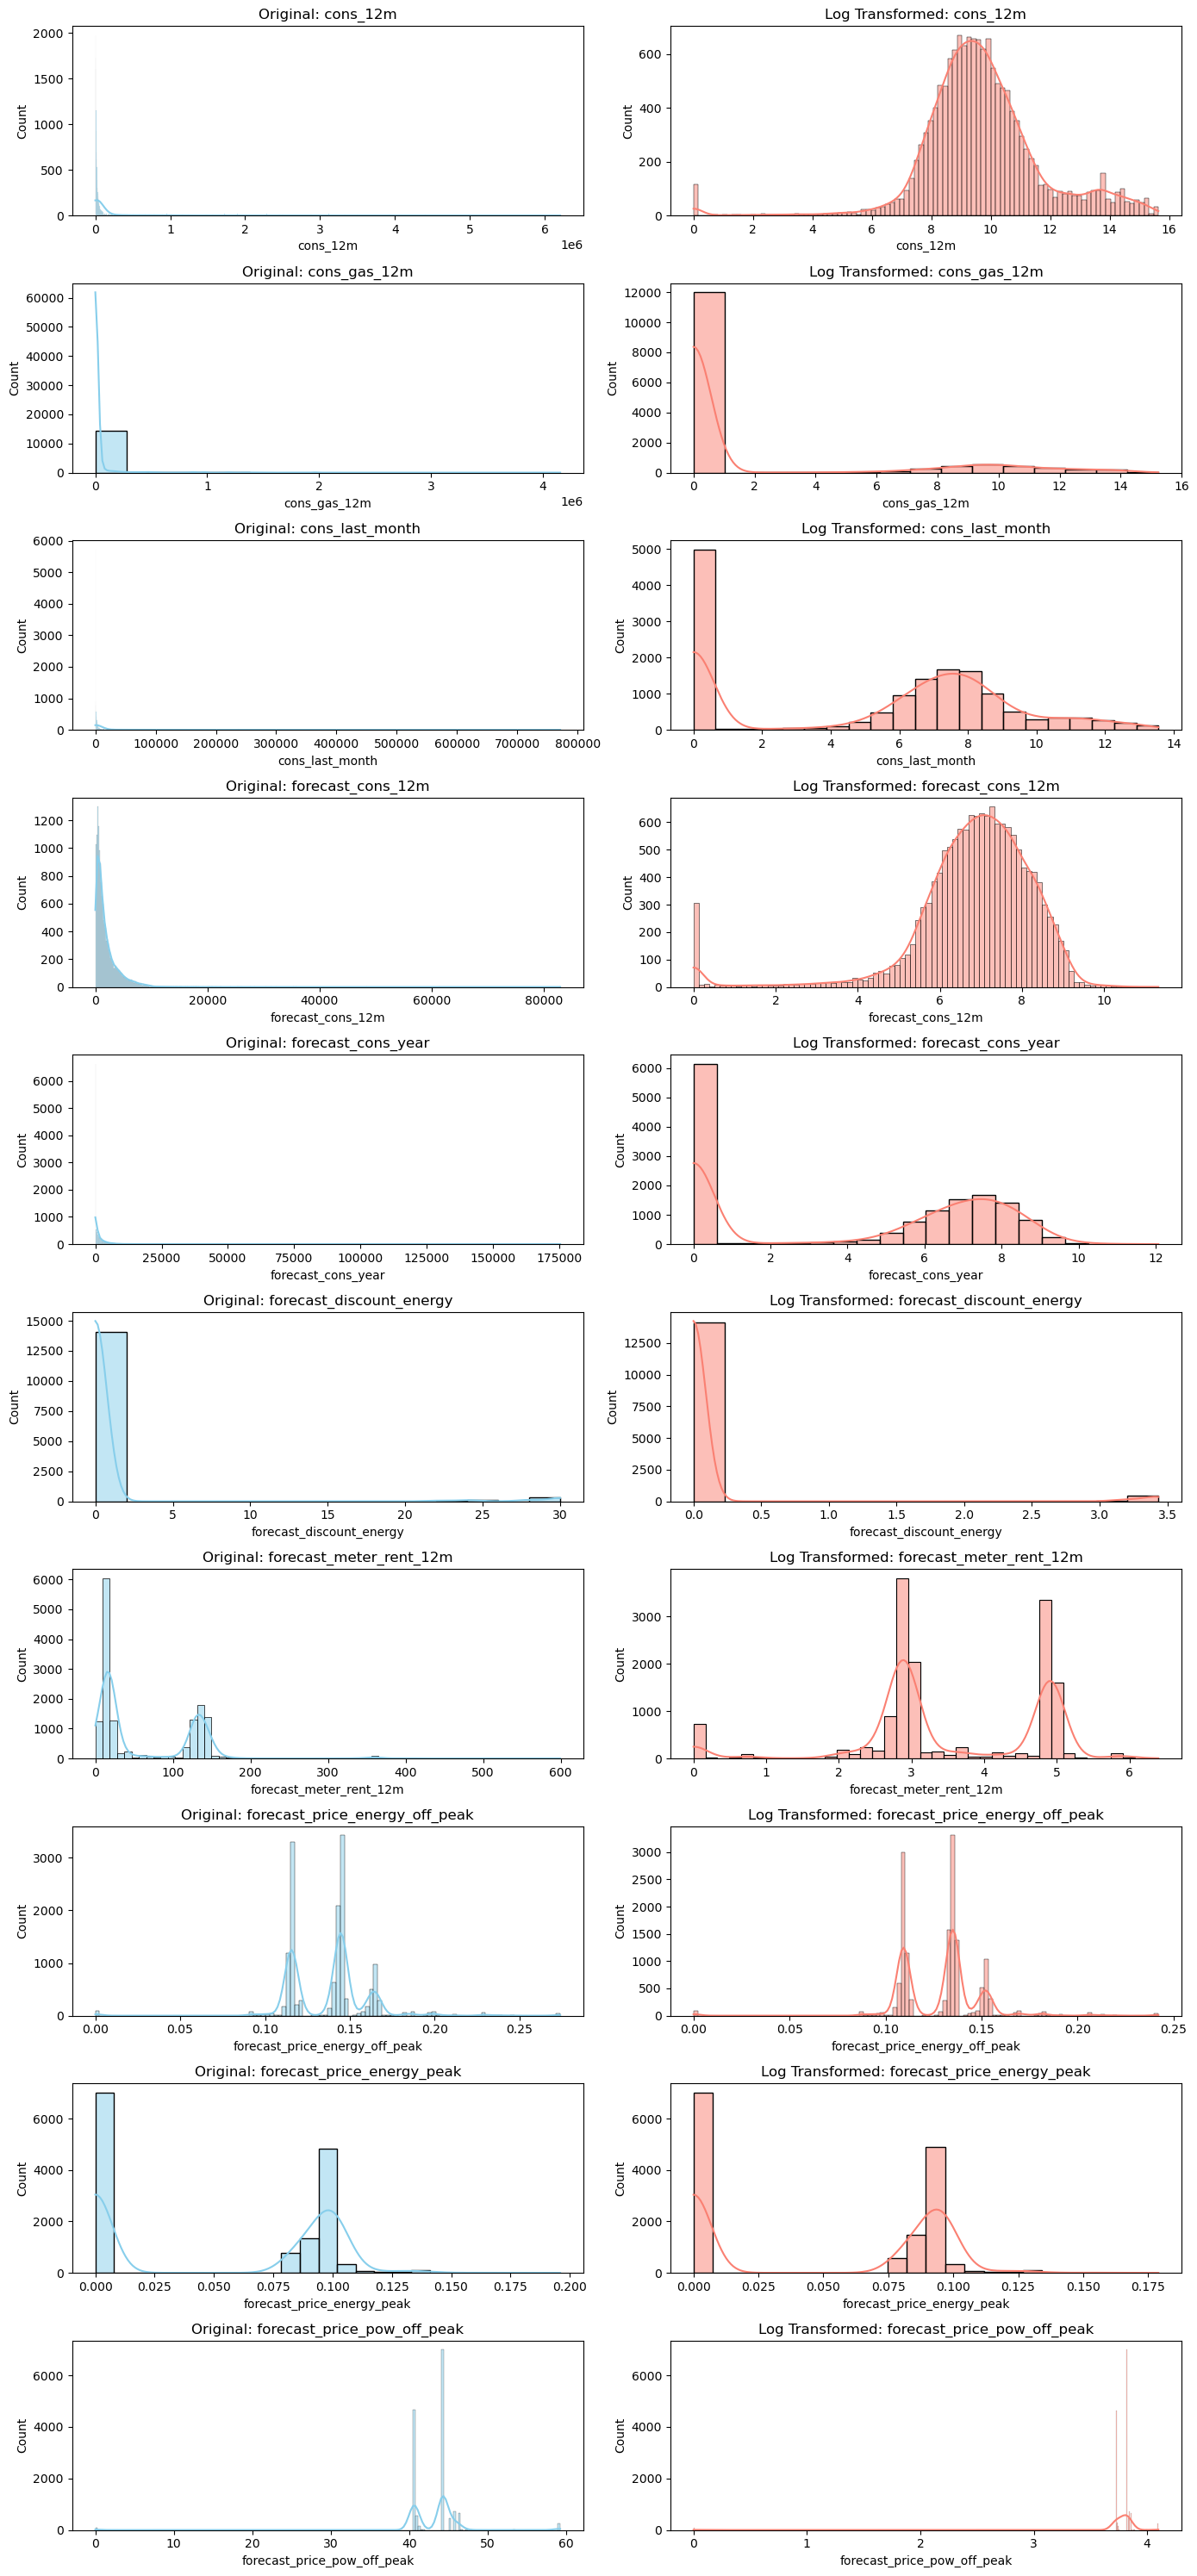

In [59]:
# Visualize Before and after 
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(14, 30))
for i, column in enumerate(numerical_features.columns):
    
    sns.histplot(numerical_features[column], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Original: {column}")
    
    sns.histplot(numerical_features_log[column], kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f"Log Transformed: {column}")

plt.tight_layout()
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   cons_12m                        14606 non-null  float64
 2   cons_gas_12m                    14606 non-null  float64
 3   cons_last_month                 14606 non-null  float64
 4   forecast_cons_12m               14606 non-null  float64
 5   forecast_cons_year              14606 non-null  float64
 6   forecast_discount_energy        14606 non-null  float64
 7   forecast_meter_rent_12m         14606 non-null  float64
 8   forecast_price_energy_off_peak  14606 non-null  float64
 9   forecast_price_energy_peak      14606 non-null  float64
 10  forecast_price_pow_off_peak     14606 non-null  float64
 11  has_gas                         14606 non-null  int64  
 12  imp_cons                        

In [61]:
corr=df.drop(columns=['id']).corr()

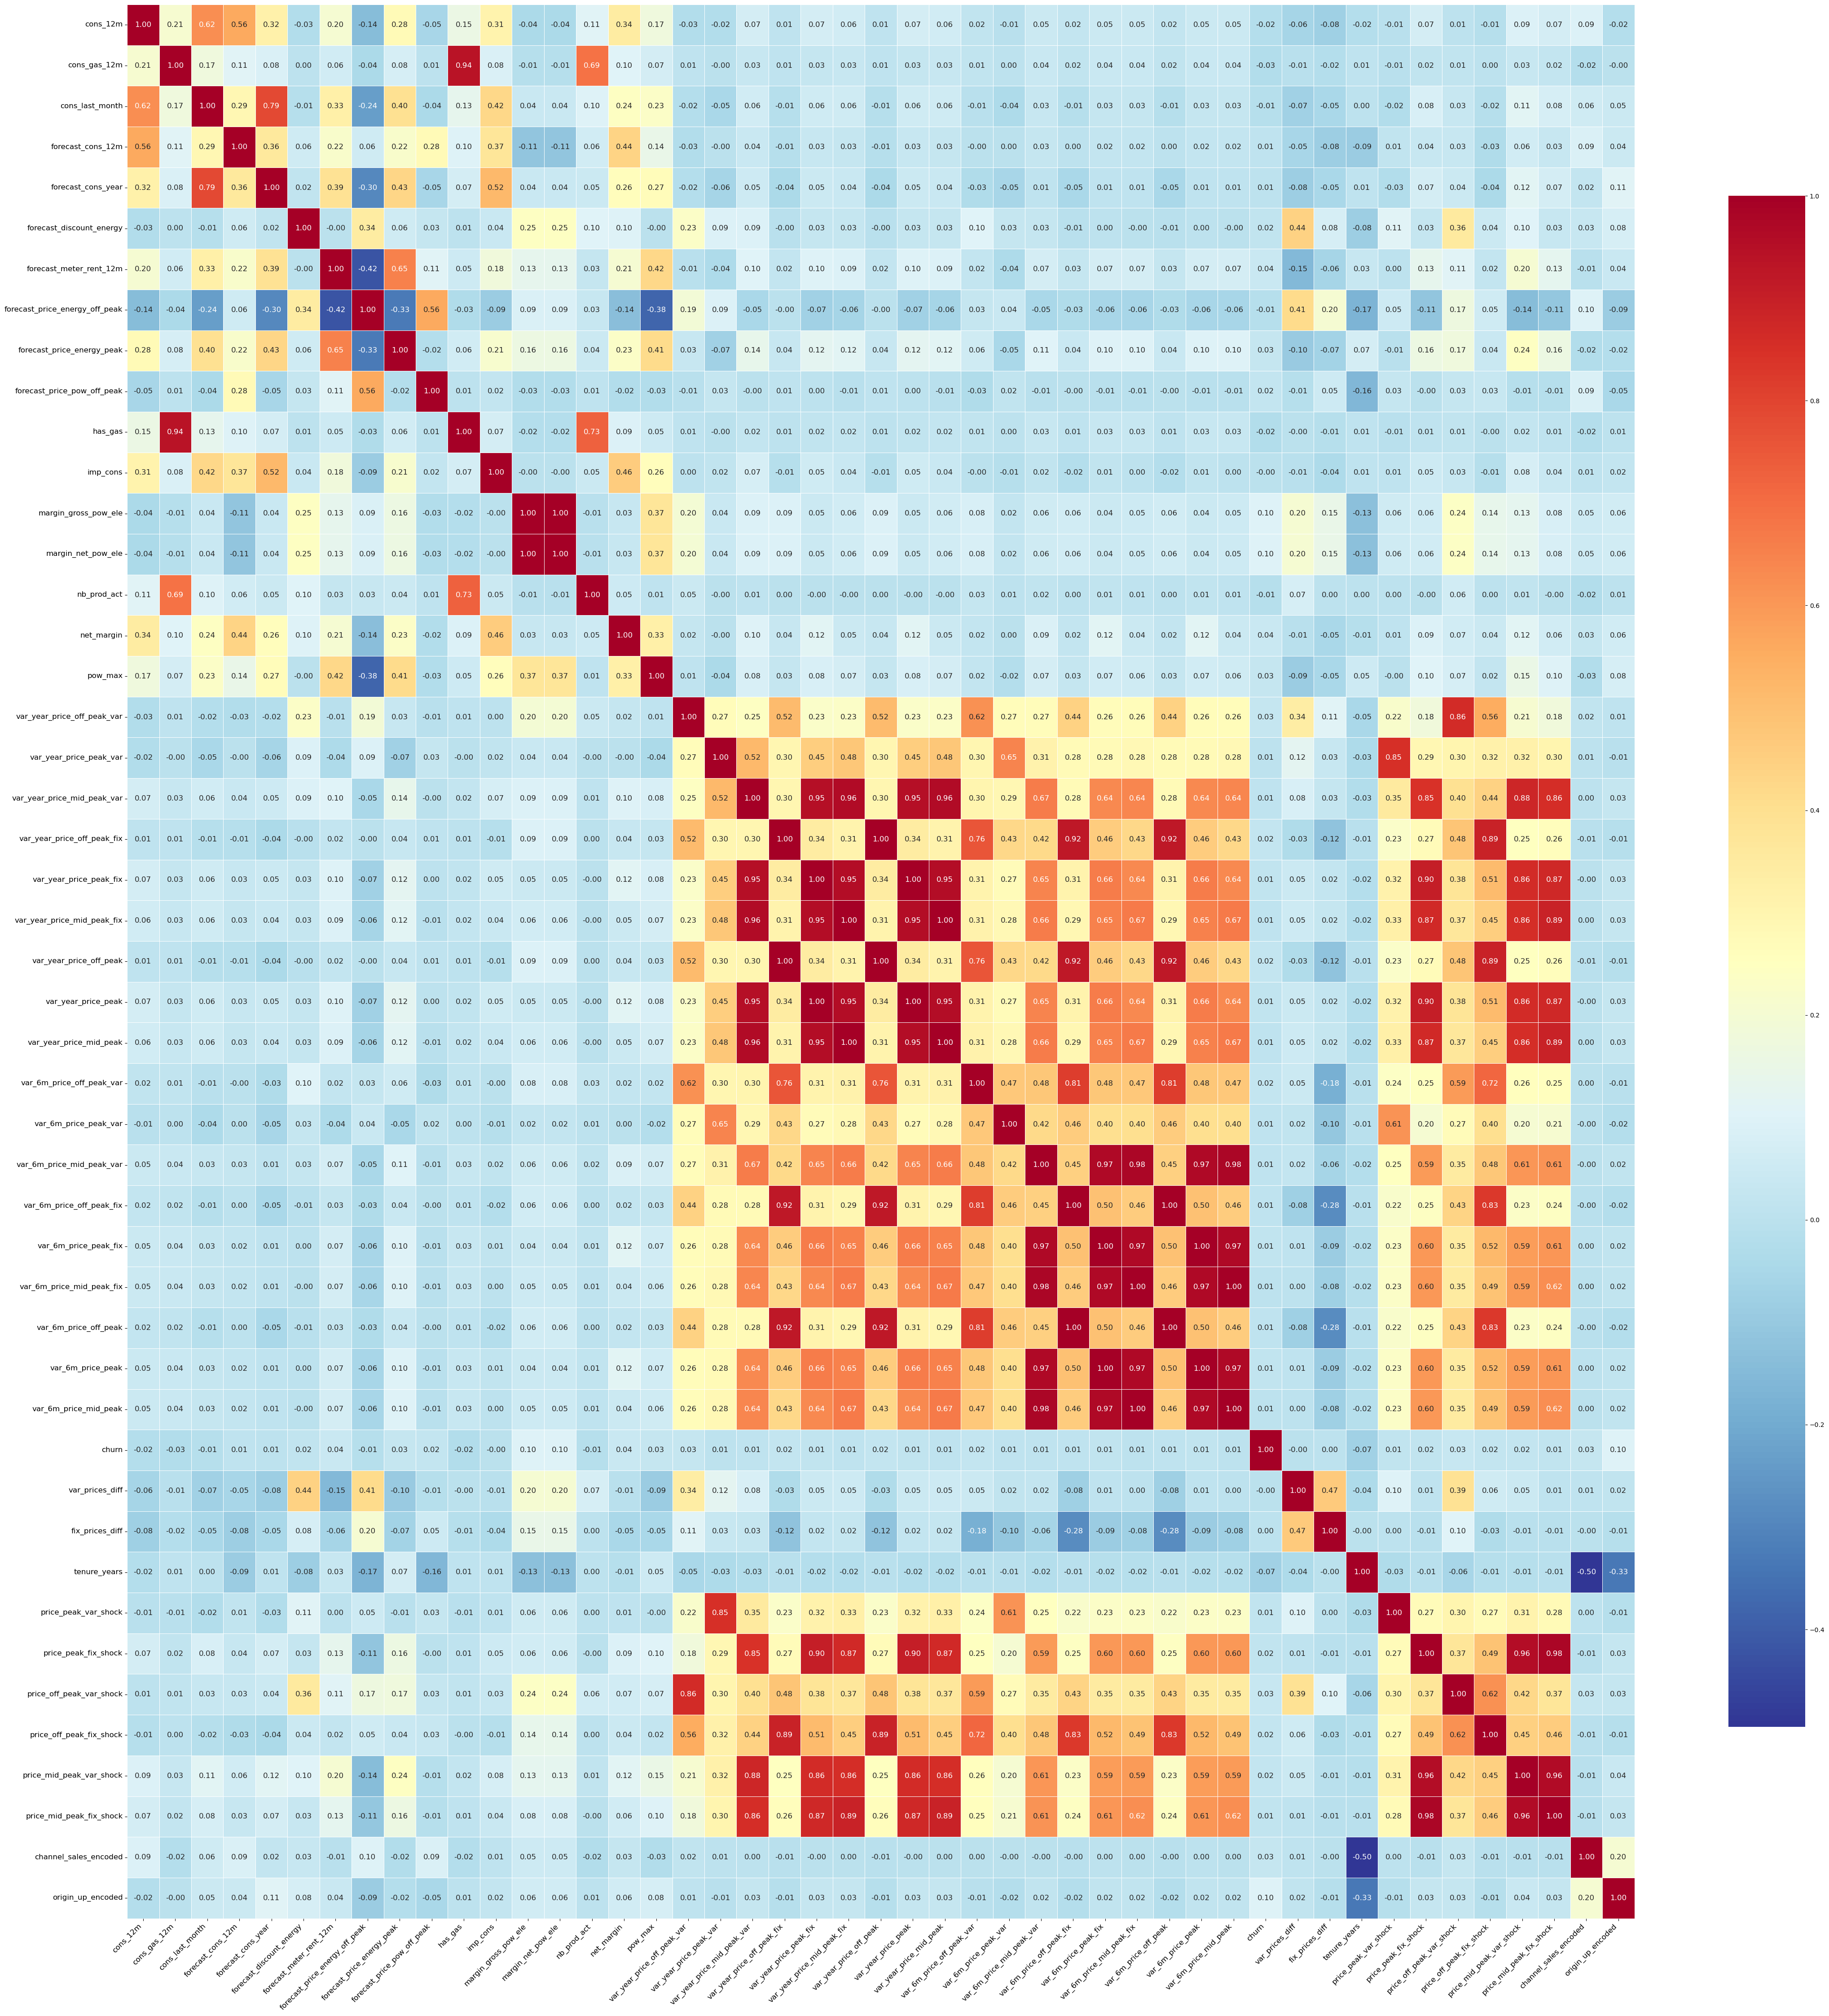

In [62]:
plt.figure(figsize=(45, 45))

sns.heatmap(corr,
            annot=True,
            cmap='RdYlBu_r',
            annot_kws={'size': 12},
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={"shrink": 0.8})

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

In [63]:
# Compute the absolute correlation matrix
corr_matrix = corr.abs()

# Create upper triangle matrix of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a correlation threshold
threshold = 0.9

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# # Display correlation matrix and features to drop
# (corr_matrix, to_drop)


In [64]:
to_drop

['has_gas',
 'margin_net_pow_ele',
 'var_year_price_peak_fix',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak_fix',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_peak',
 'var_6m_price_mid_peak',
 'price_peak_fix_shock',
 'price_mid_peak_var_shock',
 'price_mid_peak_fix_shock']

In [65]:
df = df.drop(columns=to_drop)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,var_6m_price_mid_peak_var,churn,var_prices_diff,fix_prices_diff,tenure_years,price_peak_var_shock,price_off_peak_var_shock,price_off_peak_fix_shock,channel_sales_encoded,origin_up_encoded
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,10.914124,0.000000,0.000000,0.000000,0.0,1.022451,0.108389,0.093620,...,9.084737e-04,1,0.020057,3.700961,3,0.018480,0.028554,3.700961,3,3
1,d29c2c54acc38ff3c0614d0a653813dd,8.446985,0.000000,0.000000,5.252012,0.000000,0.0,2.848971,0.136025,0.000000,...,0.000000e+00,0,-0.003767,0.177779,7,0.085483,0.005334,0.177780,0,1
2,764c75f661154dac3a6c254cd082ea7d,6.300786,0.000000,0.000000,3.891004,0.000000,0.0,3.681855,0.153402,0.084248,...,0.000000e+00,0,-0.004670,0.177779,6,0.001281,0.004670,0.177779,3,1
3,bba03439a292a1e166f80264c16191cb,7.368340,0.000000,0.000000,5.484963,0.000000,0.0,3.036394,0.136883,0.000000,...,0.000000e+00,0,-0.004547,0.177779,6,0.000000,0.004547,0.177779,4,1
4,149d57cf92fc41cf94415803a877cb4b,8.395252,0.000000,6.267201,6.101999,6.267201,0.0,4.888317,0.110557,0.095324,...,4.860000e-10,0,-0.006192,0.162916,6,0.004169,0.008161,0.162916,0,1


In [116]:
df.to_csv('churn_data.csv', index=False)